In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [3]:
cadaver_5krare = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_5krare.rds")


In [4]:
#Subset by Country
Ita = subset_samples(cadaver_5krare, Location=="Italy")
Fin = subset_samples(cadaver_5krare, Location=="Finland")
USA = subset_samples(cadaver_5krare, Location=="USA")
USA = subset_samples(USA, Case_no!="C41")


In [5]:
#Subset by Organ (by country)

liver.fin = subset_samples(Fin, Organ=="Liver") #Finland only includes liver anyway

brain.ita = subset_samples(Ita, Organ=="Brain")
heart.ita = subset_samples(Ita, Organ=="Heart")
liver.ita = subset_samples(Ita, Organ=="Liver")
prostate.ita = subset_samples(Ita, Organ=="Prostate")
spleen.ita = subset_samples(Ita, Organ=="Spleen")
uterus.ita = subset_samples(Ita, Organ=="Uterus")

blood.usa = subset_samples(USA, Organ=="Blood")
brain.usa = subset_samples(USA, Organ=="Brain")
heart.usa = subset_samples(USA, Organ=="Heart")
liver.usa = subset_samples(USA, Organ=="Liver")
spleen.usa = subset_samples(USA, Organ=="Spleen")


In [6]:
sample_tab = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/final_biom/all_cadaver_metadata.csv")
colnames(sample_tab)[1] <- "SampleID"

### Measure Observed Richness for all organs by country

In [51]:
#Italy by Organ

obs = estimate_richness(na.omit(Ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
dfobs.ita = merge(obs, sample_tab, on="SampleID")

#Finland by Organ

#obs.fin = estimate_richness(na.omit(Fin), split = TRUE, measures = "Observed")
obs.fin = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/temp_files/obs.fin.csv")
#obs.fin$SampleID = rownames(obs.fin)
dfobs.fin = merge(obs.fin, sample_tab, on="SampleID")

#USA by Organ

#obs.usa = estimate_richness(na.omit(USA), split = TRUE, measures = "Observed")
obs.usa = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/temp_files/obs.usa.csv")
#obs.usa$SampleID = rownames(obs.usa)
dfobs.usa = merge(obs.usa, sample_tab, on="SampleID")



### Check normality of data

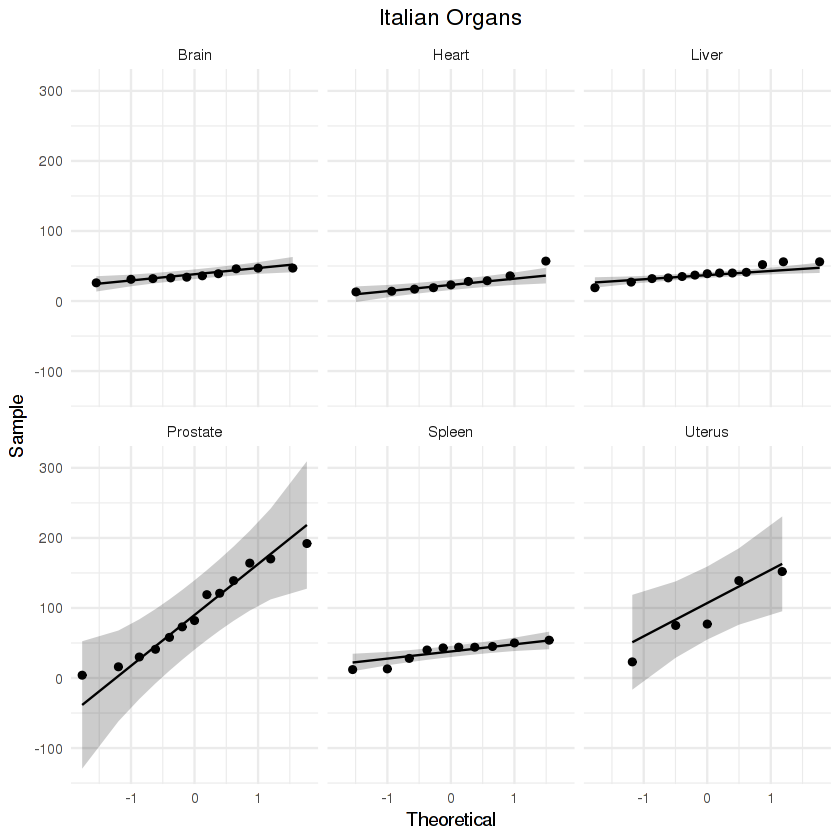

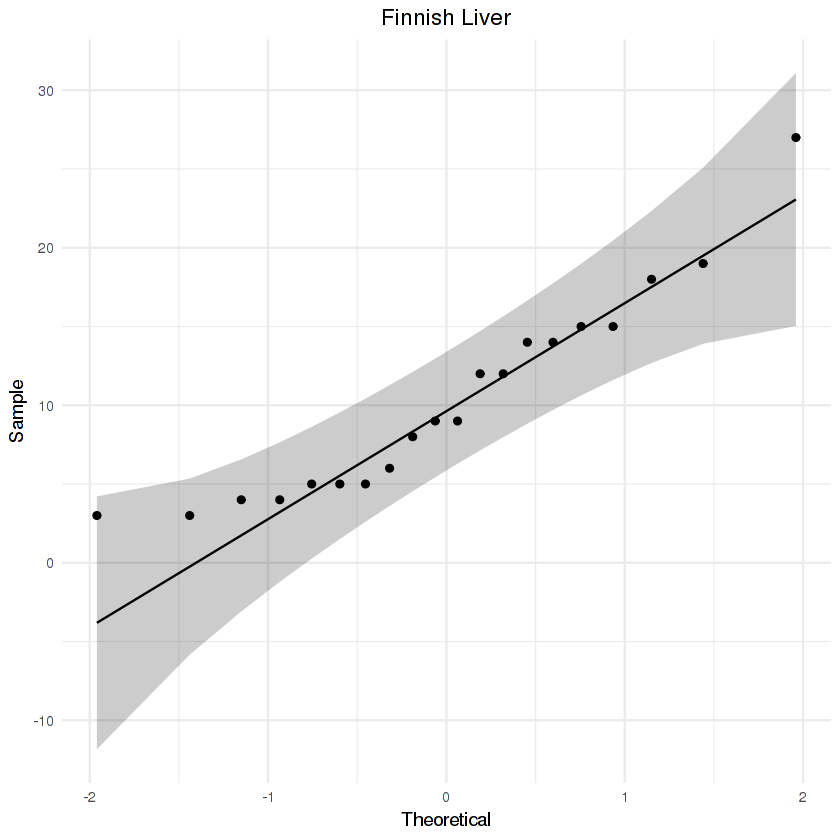

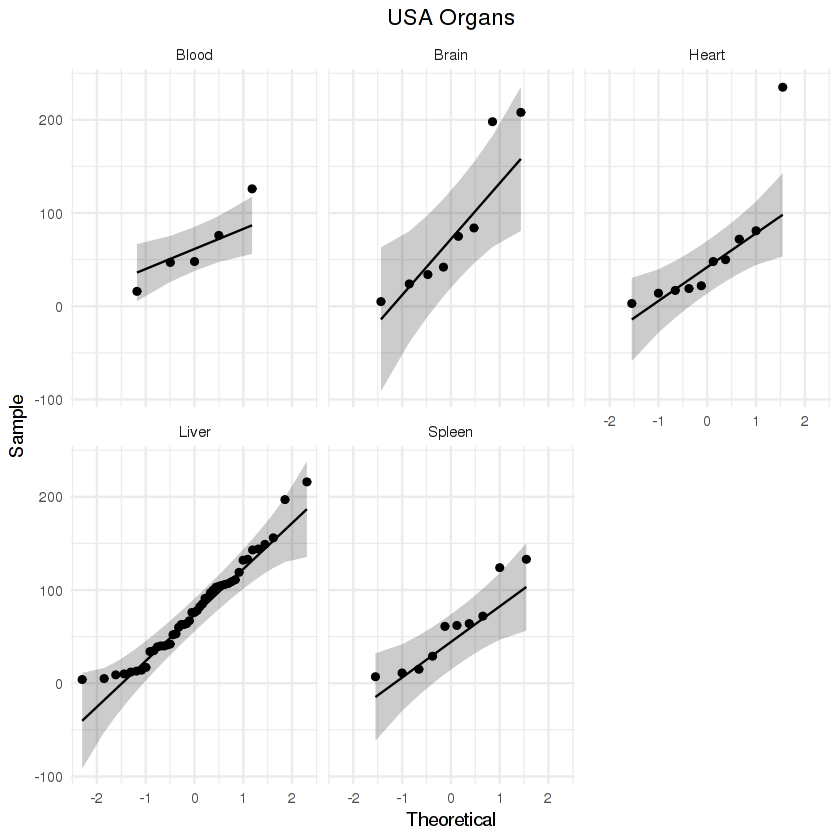

In [55]:
#Q-Q plots

p1 = ggqqplot(dfobs.ita, x = "Observed") + ggtitle("Italian Organs")
p1 = p1 + facet_wrap("Organ") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

p2 = ggqqplot(dfobs.fin, x = "Observed") + ggtitle("Finnish Liver")
p2 = p2 + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))


p3 = ggqqplot(dfobs.usa, x = "Observed") + ggtitle("USA Organs")
p3 = p3 + facet_wrap("Organ") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))


p1
p2
p3

### Plot linear regressions of all organs by country

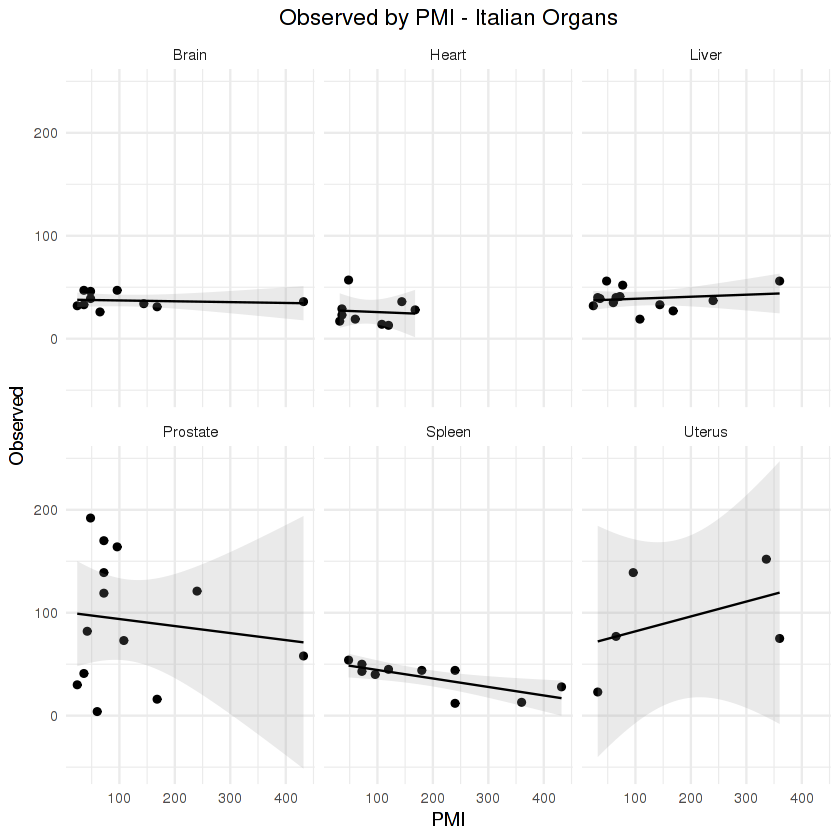

In [56]:
p = ggplot(dfobs.ita, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - Italian Organs")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) #+
        #scale_colour_brewer(palette = "Spectral")

p2 = p + facet_wrap(~Organ)
p2


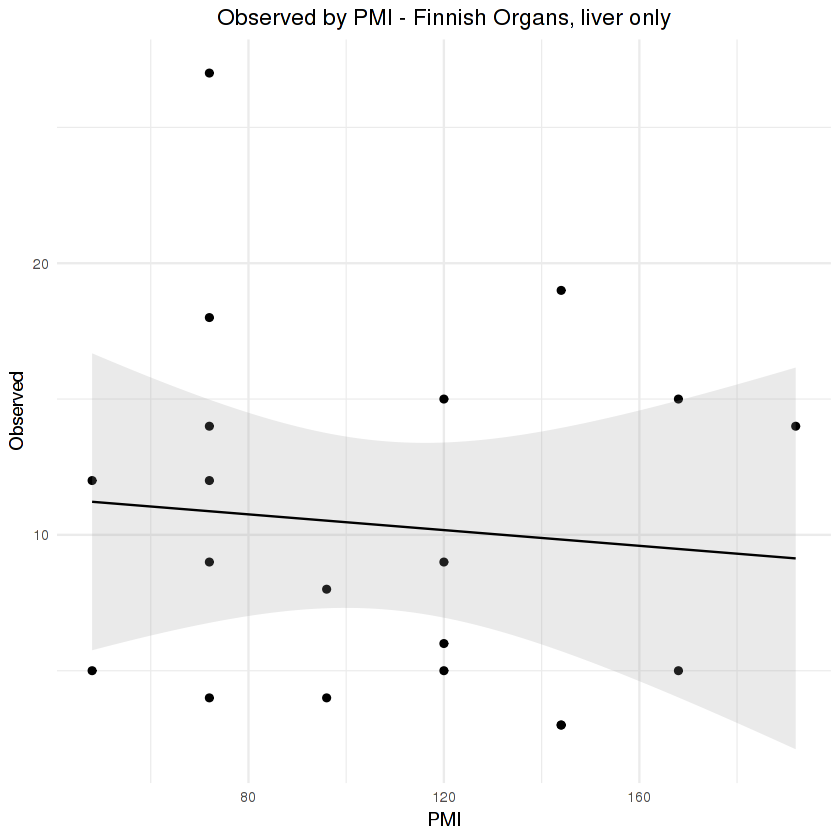

In [57]:
p = ggplot(dfobs.fin, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - Finnish Organs, liver only")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) #+
        #scale_colour_brewer(palette = "Spectral")

p
#p2 = p + facet_wrap(~Organ)
#p2


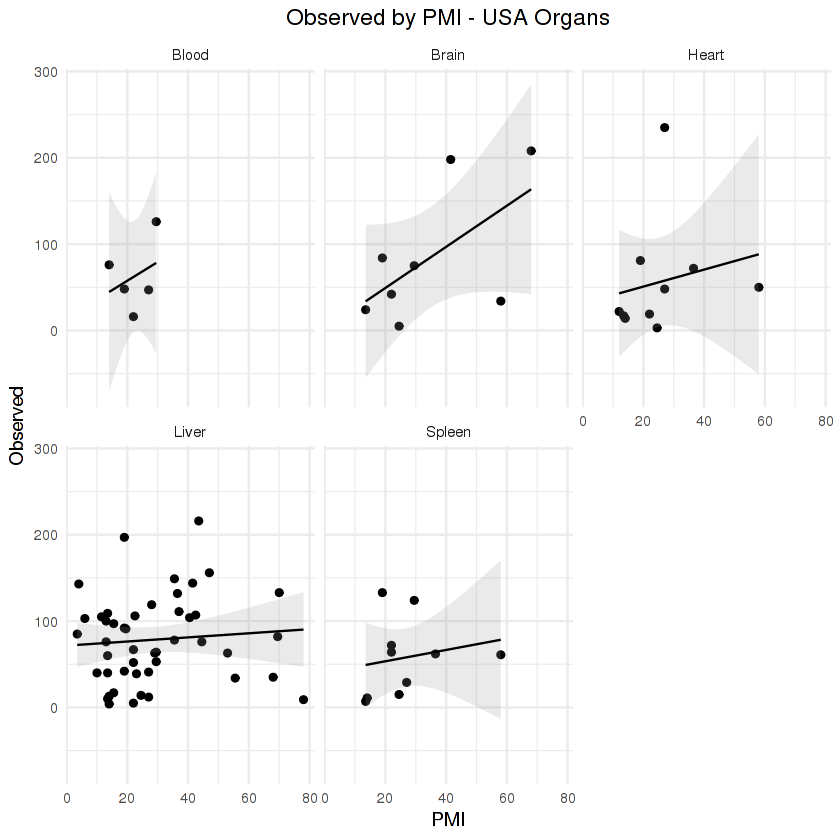

In [58]:
p = ggplot(dfobs.usa, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - USA Organs")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

p2 = p + facet_wrap(~Organ)
p2


### Repeat regressions broken down by Organ and locality

In [71]:
#######
#Italy#
#######

#brain
obs = estimate_richness(na.omit(brain.ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
brain.dfobs.ita = merge(obs, sample_tab, on="SampleID")
#heart
obs = estimate_richness(na.omit(heart.ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
heart.dfobs.ita = merge(obs, sample_tab, on="SampleID")
#liver
obs = estimate_richness(na.omit(liver.ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
liver.dfobs.ita = merge(obs, sample_tab, on="SampleID")
#prostate
obs = estimate_richness(na.omit(prostate.ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
prostate.dfobs.ita = merge(obs, sample_tab, on="SampleID")
#spleen
obs = estimate_richness(na.omit(spleen.ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
spleen.dfobs.ita = merge(obs, sample_tab, on="SampleID")
#uterus
obs = estimate_richness(na.omit(uterus.ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
uterus.dfobs.ita = merge(obs, sample_tab, on="SampleID")

#####
#USA#
#####

#blood
blood.dfobs.usa = subset(dfobs.usa, Organ=="Blood")
#brain
brain.dfobs.usa = subset(dfobs.usa, Organ=="Brain")
#heart
heart.dfobs.usa = subset(dfobs.usa, Organ=="Heart")
#liver
liver.dfobs.usa = subset(dfobs.usa, Organ=="Liver")
#spleen
spleen.dfobs.usa = subset(dfobs.usa, Organ=="Spleen")


#########
#Finland#
#########

#Liver only
liver.dfobs.fin = subset(dfobs.fin, Organ=="Liver")


### Estimate fit for each organ by country

In [60]:
#Italian Brain
p1 = ggplot(brain.dfobs.ita, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - Italian Brain")
p1 = p1 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ PMI, data = brain.dfobs.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,9.072991,9.072991,0.1500204,0.7086166
Residuals,8,483.827009,60.478376,NA,NA



Call:
lm(formula = Observed ~ PMI, data = brain.dfobs.ita)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4645  -5.3937  -0.7117   6.6797   9.7883 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.994497   3.373615  11.262 3.47e-06 ***
PMI         -0.008154   0.021052  -0.387    0.709    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.777 on 8 degrees of freedom
Multiple R-squared:  0.01841,	Adjusted R-squared:  -0.1043 
F-statistic:  0.15 on 1 and 8 DF,  p-value: 0.7086


In [61]:
#Italian Heart
p2 = ggplot(heart.dfobs.ita, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - Italian heart")
p2 = p2 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
fit = lm(Observed ~ PMI, data = heart.dfobs.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,10.05023,10.05023,0.04642124,0.8355551
Residuals,7,1515.50532,216.50076,NA,NA



Call:
lm(formula = Observed ~ PMI, data = heart.dfobs.ita)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.438 -10.332  -4.245   3.595  30.013 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 28.01998    9.67872   2.895   0.0232 *
PMI         -0.02152    0.09986  -0.215   0.8356  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.71 on 7 degrees of freedom
Multiple R-squared:  0.006588,	Adjusted R-squared:  -0.1353 
F-statistic: 0.04642 on 1 and 7 DF,  p-value: 0.8356


In [62]:
#Italian Liver
p3 = ggplot(liver.dfobs.ita, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - Italian liver")
p3 = p3 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ PMI, data = liver.dfobs.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,44.49346,44.49346,0.3605346,0.5603768
Residuals,11,1357.50654,123.40969,NA,NA



Call:
lm(formula = Observed ~ PMI, data = liver.dfobs.ita)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.954  -5.293   1.469   2.757  18.232 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.81868    4.76346   7.729 9.05e-06 ***
PMI          0.01977    0.03293   0.600     0.56    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.11 on 11 degrees of freedom
Multiple R-squared:  0.03174,	Adjusted R-squared:  -0.05629 
F-statistic: 0.3605 on 1 and 11 DF,  p-value: 0.5604


In [63]:
#Italian Spleen
p4 = ggplot(spleen.dfobs.ita, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - Italian spleen")
p4 = p4 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ PMI, data = spleen.dfobs.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,1048.613,1048.6130,9.347104,0.01564652
Residuals,8,897.487,112.1859,NA,NA



Call:
lm(formula = Observed ~ PMI, data = spleen.dfobs.ita)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.846  -4.468   2.777   5.983  11.154 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52.64073    6.03293   8.726 2.33e-05 ***
PMI         -0.08248    0.02698  -3.057   0.0156 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.59 on 8 degrees of freedom
Multiple R-squared:  0.5388,	Adjusted R-squared:  0.4812 
F-statistic: 9.347 on 1 and 8 DF,  p-value: 0.01565


In [64]:
#Italian Prostate
p5 = ggplot(prostate.dfobs.ita, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - Italian prostate")
p5 = p5 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ PMI, data = prostate.dfobs.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,708.7462,708.7462,0.1698252,0.6881839
Residuals,11,45907.2538,4173.3867,NA,NA



Call:
lm(formula = Observed ~ PMI, data = prostate.dfobs.ita)

Residuals:
   Min     1Q Median     3Q    Max 
-92.62 -57.26 -13.24  43.20  94.56 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 100.71643   25.91611   3.886  0.00254 **
PMI          -0.06824    0.16559  -0.412  0.68818   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 64.6 on 11 degrees of freedom
Multiple R-squared:  0.0152,	Adjusted R-squared:  -0.07432 
F-statistic: 0.1698 on 1 and 11 DF,  p-value: 0.6882


In [65]:
#Italian Uterus
p6 = ggplot(uterus.dfobs.ita, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - Italian uterus")
p6 = p6 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ PMI, data = uterus.dfobs.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,2068.347,2068.347,0.6888022,0.467445
Residuals,3,9008.453,3002.818,NA,NA



Call:
lm(formula = Observed ~ PMI, data = uterus.dfobs.ita)

Residuals:
       1        2        3        4        5 
 57.6297  35.9215 -49.1148   0.1128 -44.5493 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  67.4870    39.5023   1.708    0.186
PMI           0.1446     0.1743   0.830    0.467

Residual standard error: 54.8 on 3 degrees of freedom
Multiple R-squared:  0.1867,	Adjusted R-squared:  -0.08436 
F-statistic: 0.6888 on 1 and 3 DF,  p-value: 0.4674


In [70]:
#US Blood
p7 = ggplot(blood.dfobs.usa, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - USA blood")
p7 = p7 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ PMI, data = blood.dfobs.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,725.766,725.766,0.3568502,0.5923442
Residuals,3,6101.434,2033.811,NA,NA



Call:
lm(formula = Observed ~ PMI, data = blood.dfobs.usa)

Residuals:
      5      13      17      22      36 
 -7.431 -45.948  31.430  47.759 -25.810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   14.158     83.563   0.169    0.876
PMI            2.172      3.636   0.597    0.592

Residual standard error: 45.1 on 3 degrees of freedom
Multiple R-squared:  0.1063,	Adjusted R-squared:  -0.1916 
F-statistic: 0.3569 on 1 and 3 DF,  p-value: 0.5923


In [72]:
#US Brain
p8 = ggplot(brain.dfobs.usa, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - USA Brain")
p8 = p8 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ PMI, data = brain.dfobs.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,15235.15,15235.149,3.345645,0.1171324
Residuals,6,27322.35,4553.725,NA,NA



Call:
lm(formula = Observed ~ PMI, data = brain.dfobs.usa)

Residuals:
     Min       1Q   Median       3Q      Max 
-105.718  -22.718   -3.289   38.990   97.579 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    1.585     50.864   0.031    0.976
PMI            2.382      1.302   1.829    0.117

Residual standard error: 67.48 on 6 degrees of freedom
Multiple R-squared:  0.358,	Adjusted R-squared:  0.251 
F-statistic: 3.346 on 1 and 6 DF,  p-value: 0.1171


In [73]:
#US Heart
p9 = ggplot(heart.dfobs.usa, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - USA heart")
p9 = p9 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ PMI, data = heart.dfobs.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,1640.233,1640.233,0.3280412,0.5825498
Residuals,8,40000.667,5000.083,NA,NA



Call:
lm(formula = Observed ~ PMI, data = heart.dfobs.usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.264 -33.088 -24.207   1.269 177.277 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  31.1668    48.9397   0.637    0.542
PMI           0.9836     1.7173   0.573    0.583

Residual standard error: 70.71 on 8 degrees of freedom
Multiple R-squared:  0.03939,	Adjusted R-squared:  -0.08069 
F-statistic: 0.328 on 1 and 8 DF,  p-value: 0.5825


In [74]:
#US Liver
p10 = ggplot(liver.dfobs.usa, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - USA liver")
p10 = p10 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ PMI, data = liver.dfobs.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,872.9602,872.9602,0.3372623,0.5643111
Residuals,45,116476.7419,2588.3720,NA,NA



Call:
lm(formula = Observed ~ PMI, data = liver.dfobs.usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-81.187 -35.926  -6.162  30.276 134.034 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6008    13.9607   5.129 5.98e-06 ***
PMI           0.2383     0.4103   0.581    0.564    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.88 on 45 degrees of freedom
Multiple R-squared:  0.007439,	Adjusted R-squared:  -0.01462 
F-statistic: 0.3373 on 1 and 45 DF,  p-value: 0.5643


In [75]:
#US Spleen
p11 = ggplot(spleen.dfobs.usa, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - USA spleen")
p11 = p11 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ PMI, data = spleen.dfobs.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,657.5912,657.5912,0.3080051,0.5940801
Residuals,8,17080.0088,2135.0011,NA,NA



Call:
lm(formula = Observed ~ PMI, data = spleen.dfobs.usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.204 -36.165  -9.849  15.218  80.187 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  40.3465    34.6775   1.163    0.278
PMI           0.6561     1.1823   0.555    0.594

Residual standard error: 46.21 on 8 degrees of freedom
Multiple R-squared:  0.03707,	Adjusted R-squared:  -0.08329 
F-statistic: 0.308 on 1 and 8 DF,  p-value: 0.5941


In [76]:
#Finnish Liver (only liver from Finland)
p12 = ggplot(liver.dfobs.fin, aes(x=PMI, y=Observed)) + geom_point() +  ggtitle("Observed by PMI - Finnish liver")
p12 = p12 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ PMI, data = liver.dfobs.fin)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,7.122881,7.122881,0.164074,0.6902065
Residuals,18,781.427119,43.412618,NA,NA



Call:
lm(formula = Observed ~ PMI, data = liver.dfobs.fin)

Residuals:
   Min     1Q Median     3Q    Max 
-6.871 -5.437 -1.524  4.834 16.129 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 11.91356    4.13167   2.883  0.00989 **
PMI         -0.01448    0.03574  -0.405  0.69021   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.589 on 18 degrees of freedom
Multiple R-squared:  0.009033,	Adjusted R-squared:  -0.04602 
F-statistic: 0.1641 on 1 and 18 DF,  p-value: 0.6902


### Print plots for figures

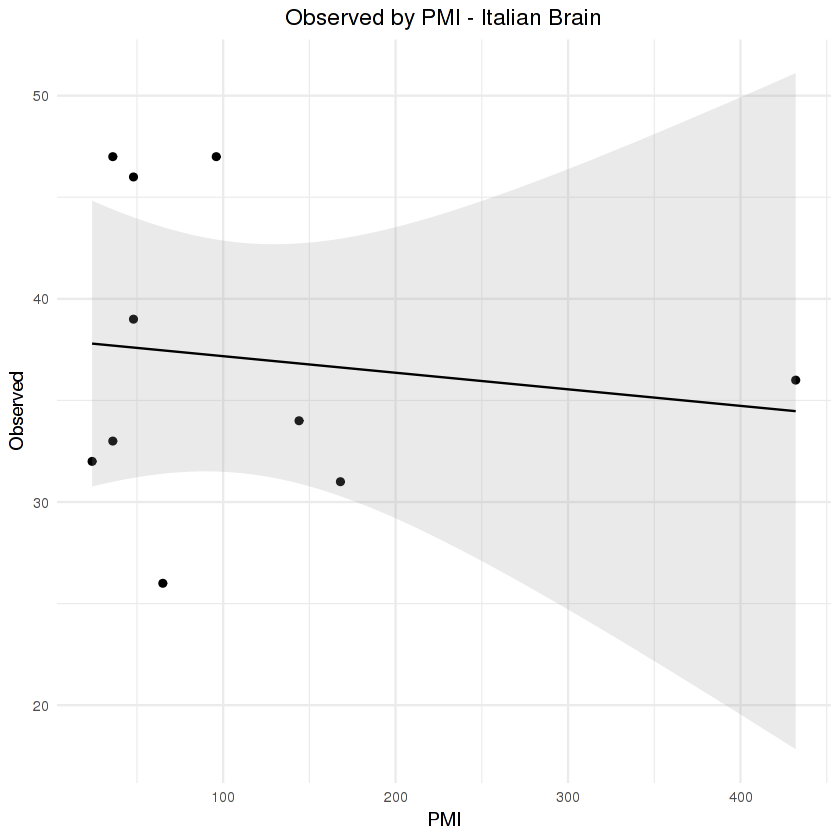

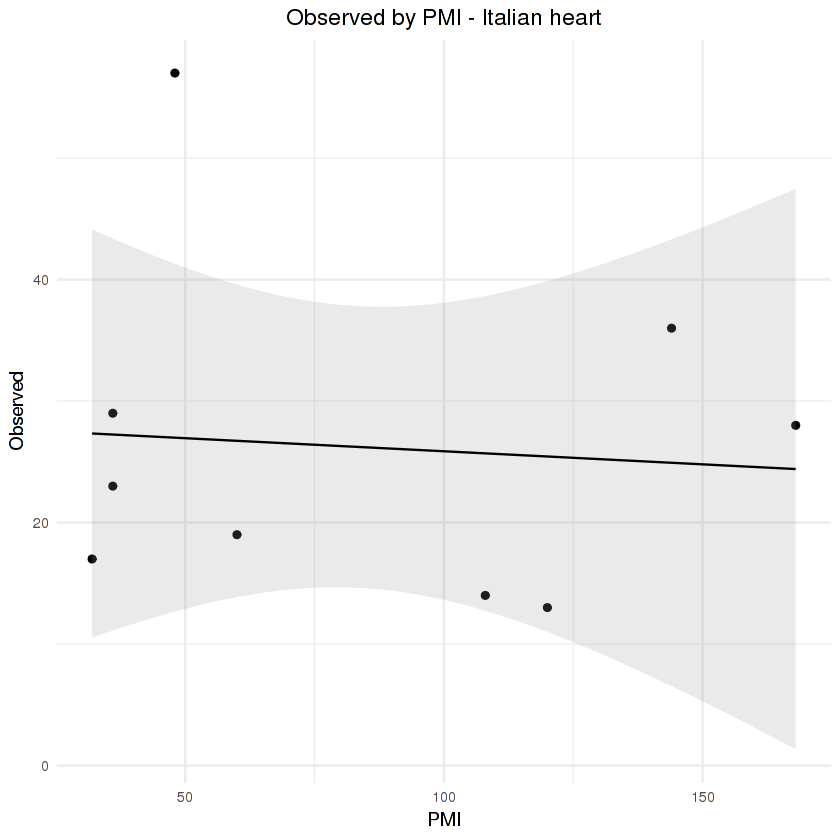

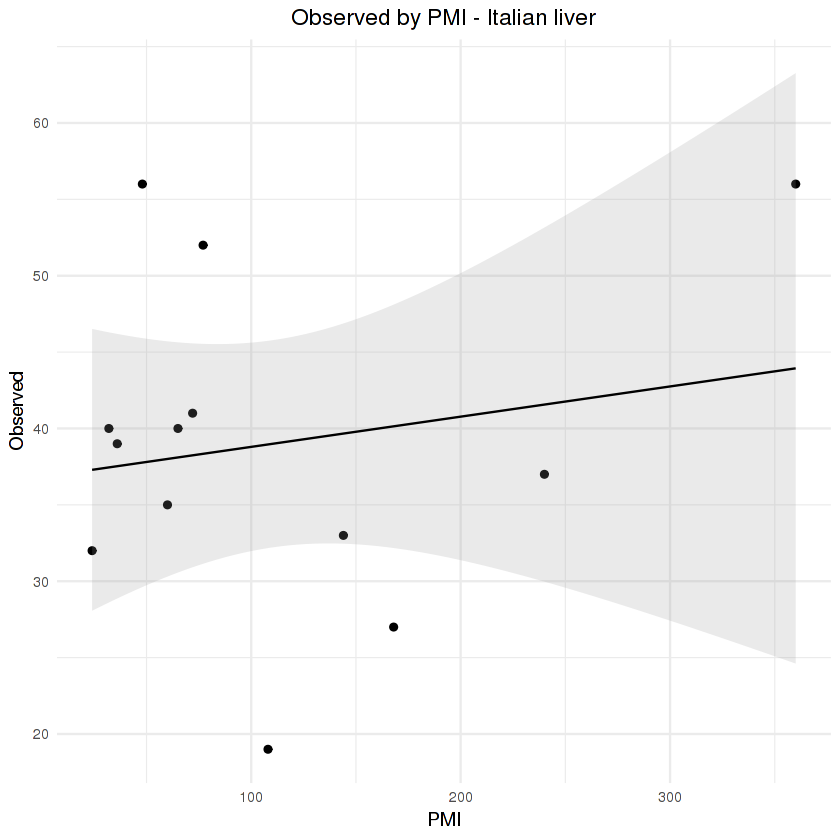

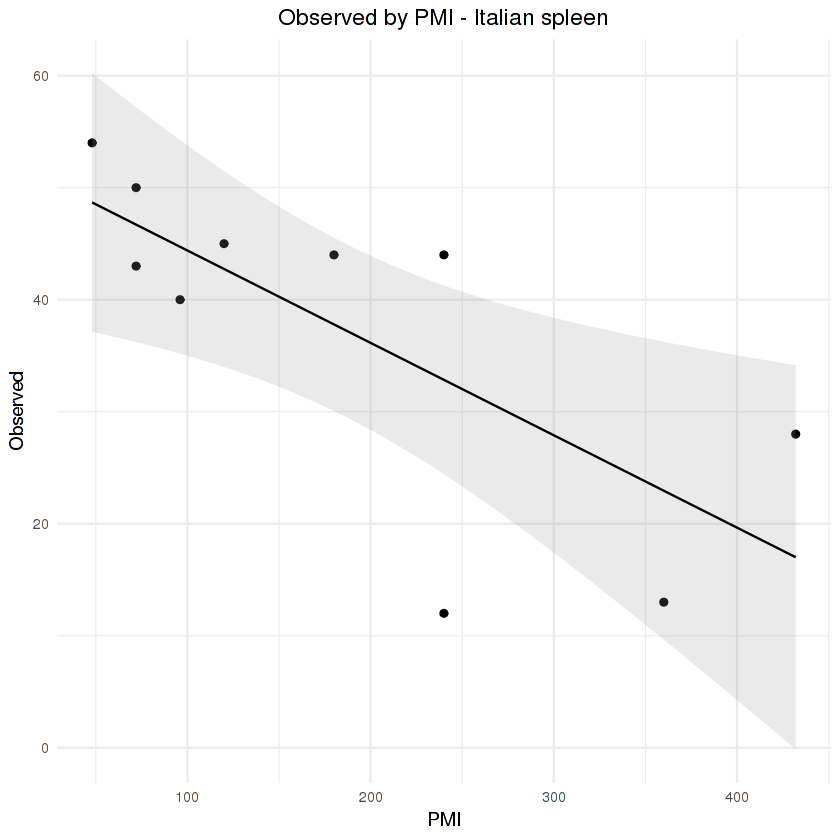

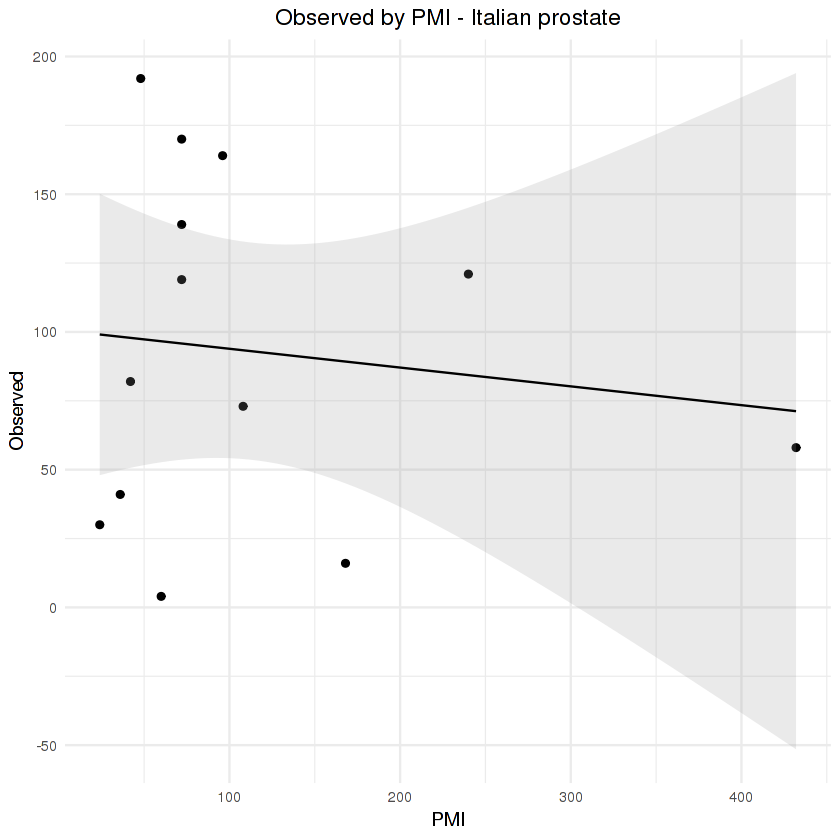

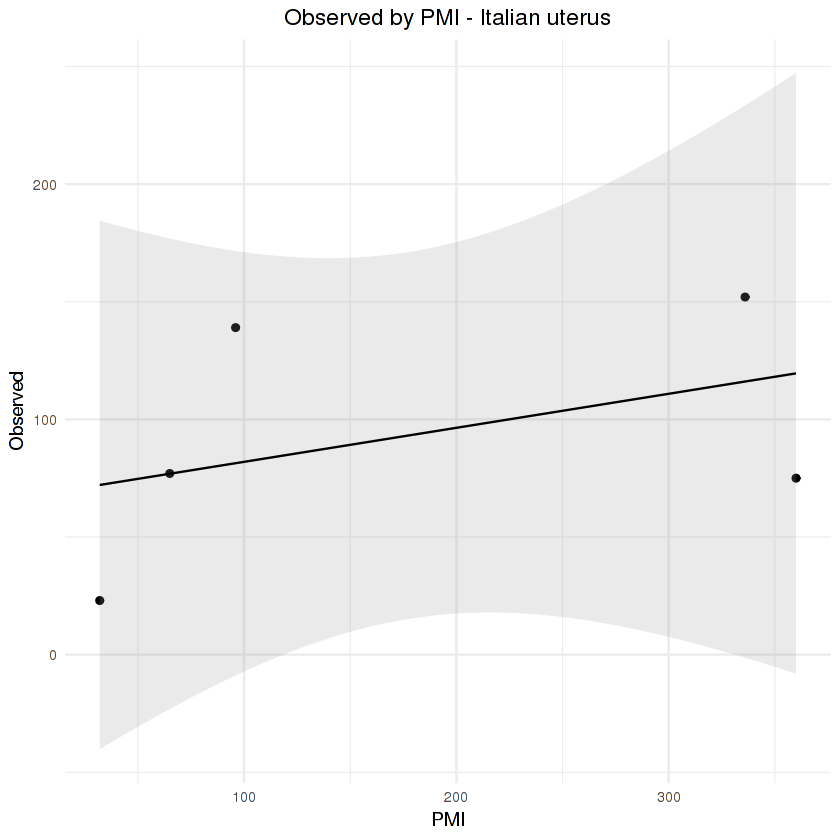

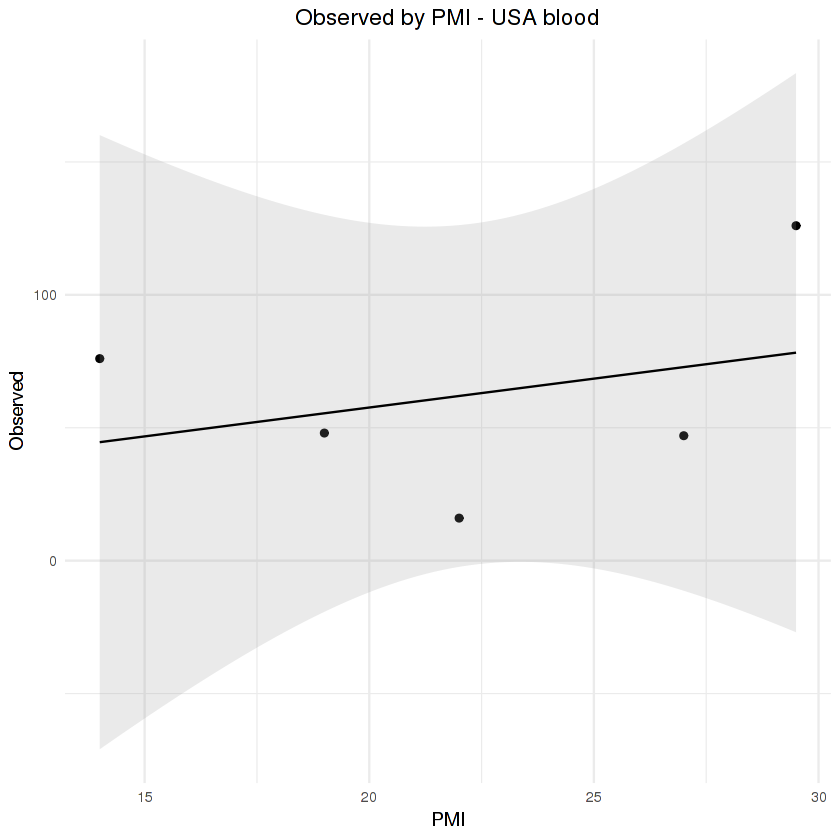

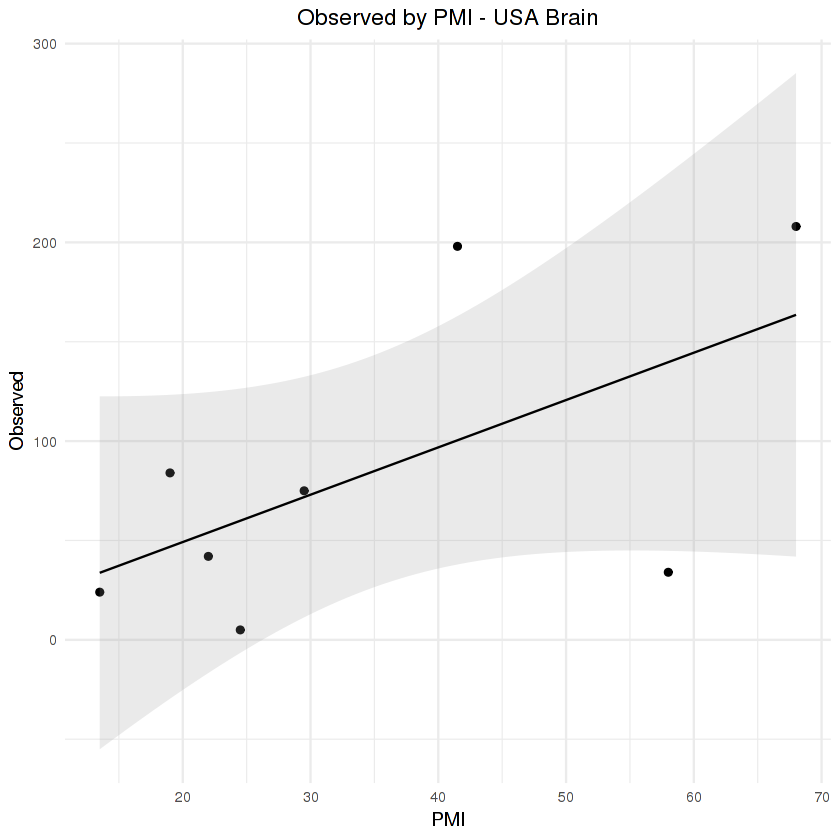

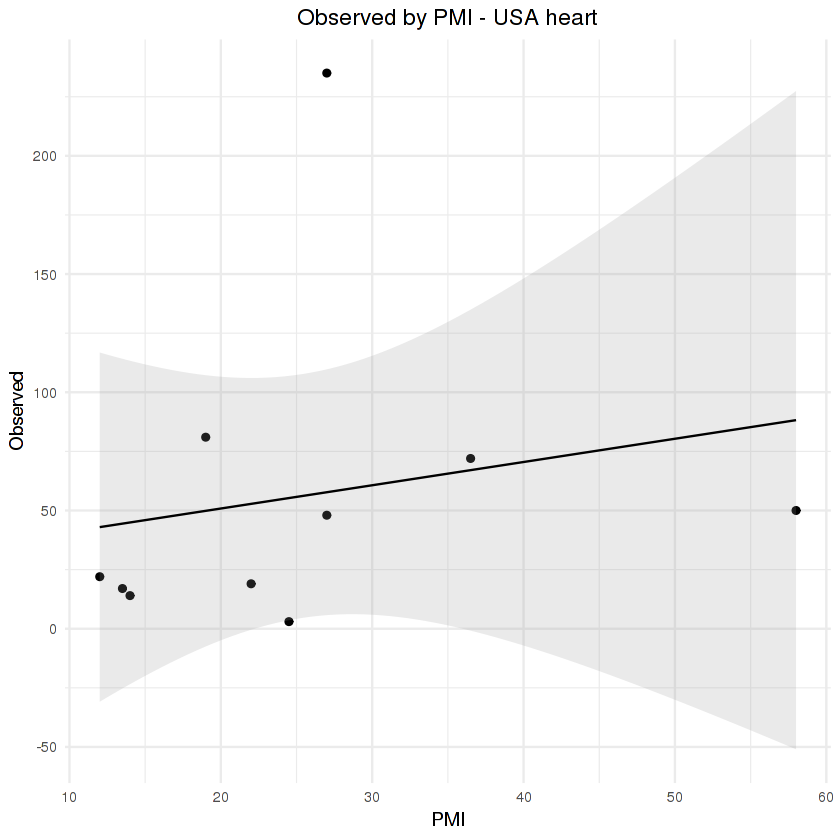

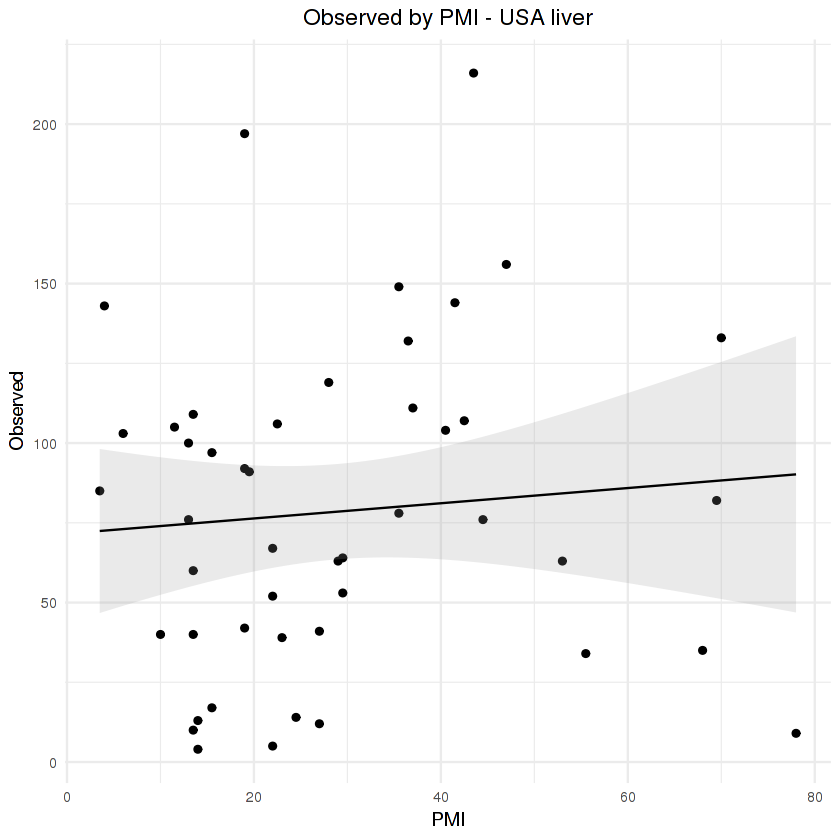

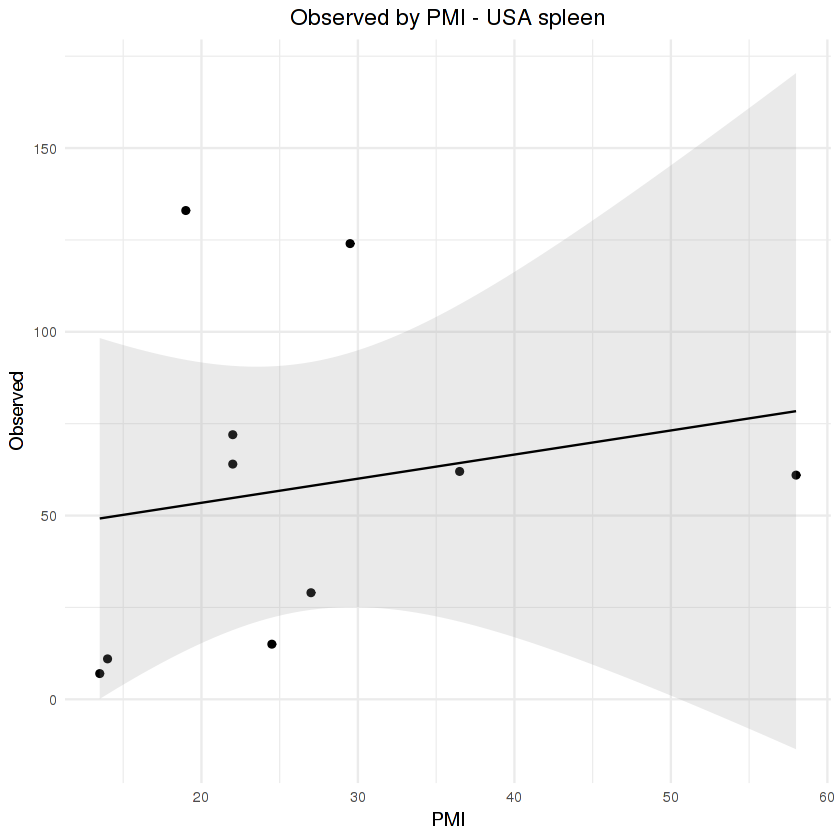

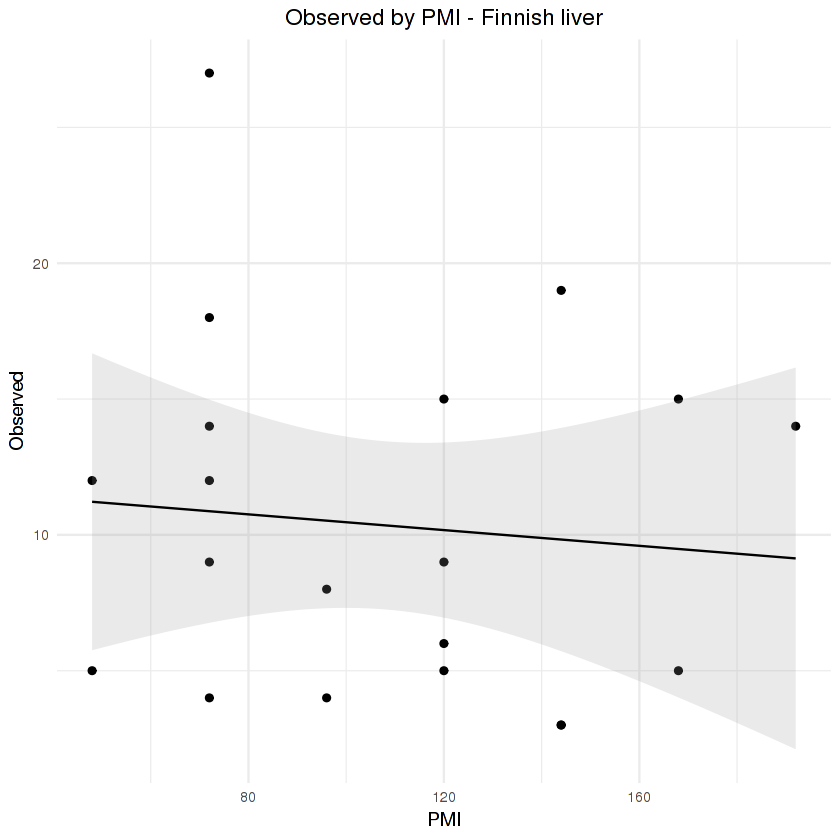

In [77]:
p1 
p2 
p3
p4
p5
p6
p7
p8
p9
p10
p11
p12